In [18]:

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [19]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)
K = len(np.unique(y_train)) # Return the unique elements of a tratining output set and take it length as Classes
Ntr = x_train.shape[0] # number of training examples
Nte = x_test.shape[0] # number of testing examples
Din = 3072 # By CIFAR10 data set with 32 x 32 x 3 color images

x_train = x_train[range(Ntr), :]
x_test = x_test[range(Nte), :]
y_train = y_train[range(Ntr)]
y_test = y_test[range(Nte)]


y_train = tf.keras.utils.to_categorical(y_train, num_classes=K) # This function returns a matrix of binary values (either ‘1’ or ‘0’). It has number of rows equal to the length of the input vector and number of columns equal to the number of classes.
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din)).astype('float32') # reshape the data set
x_test = np.reshape(x_test,(Nte,Din)).astype('float32')

#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

H = 200 # No of hidden nodes
std=1e-6 # standard deviation (sigma)
w1 = std*np.random.randn(Din, H) #Return a sample (or samples) from the “standard normal” distribution.
w2 = std*np.random.randn(H, K)
b1 = np.zeros(H) # creating array of zeros
b2 = np.zeros(K)
print("w1:", w1.shape)
print("w2:", w2.shape)
print("b1:", b1.shape)
print("b2:", b2.shape)

x_train: (50000, 32, 32, 3)
w1: (3072, 200)
w2: (200, 10)
b1: (200,)
b2: (10,)


In [20]:
batch_size1 = Ntr # for gradient descent optimization batch size is equal to number of training set

iterations = 300 # epochs
lr = 1.4e-2 # the learning rate alpha
lr_decay = 0.999
reg = 5e-6 # the regularization constant
loss_history1 = []
train_acc_history1 = []
val_acc_history1 = []
lr_history1 = []

for t in range(iterations):
    batch_indices = np.random.choice(Ntr, batch_size1)
    x = x_train[batch_indices]
    y = y_train[batch_indices]
    #forward
    #----------------------------------------------for train set---------------------------------------------------------------------
    h = 1.0/(1.0 + np.exp(-(x.dot(w1) + b1 ))) # create a activation function (sigmoid function)
    y_pred = h.dot(w2) + b2 # create predictable output
    #----------------------------------------------for test set----------------------------------------------------------------------
    h_t = 1.0/(1.0 + np.exp(-(x_test.dot(w1) + b1 ))) # create a activation function for test data (sigmoid function)
    y_pred_test = h_t.dot(w2) + b2 # create predictable output
    #--------------------------------------------------------------------------------------------------------------------------------
    loss = (1./batch_size1)*np.square(y_pred - y).sum() + reg*(np.sum(w2*w2) + np.sum(w1*w1)) # loss function with regularization term 
    loss_history1.append(loss)
    
    # compute the accuracy as percentage
    training_acc = 100*(1 - (1/(batch_size1*K))*(np.abs(np.argmax(y,axis=1) - np.argmax(y_pred,axis=1))).sum())  
    testing_acc = 100*(1 - (1/(Nte*K))*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred_test,axis=1))).sum())
    train_acc_history1.append(training_acc)
    val_acc_history1.append(testing_acc)

In [21]:
if t % 10 == 0:
    print("iteration %d / %d| loss %f| training accuracy %f| testing accuracy %f" % (t, iterations, loss, training_acc, testing_acc))
    #backward
    dy_pred = 1./batch_size1*2.0*(y_pred - y) # partial derivatives w.r.t y_predicted
    dw2 = h.T.dot(dy_pred) + reg*w2
    db2 = dy_pred.sum(axis=0)
    dh = dy_pred.dot(w2.T)
    dw1 = x.T.dot(dh*h*(1-h)) + reg*w1
    db1 = (dh*h*(1-h)).sum(axis=0)

    # updating learning parameters
    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -= lr*db1
    b2 -= lr*db2
    lr *= lr_decay
    
    lr_history1.append(lr)

In [22]:
batch_size = 500 # for gradient descent optimization batch size is equal to number of training set
iterations = 300 # epochs
lr = 1.4e-2 # the learning rate alpha
lr_decay = 0.999
reg = 5e-6 # the regularization constant
loss_history = []
train_acc_history = []
val_acc_history = []
lr_history = []

In [23]:
for t in range(iterations):
    for start in range(0, Ntr, batch_size):
        batch_indices = np.random.choice(Ntr, batch_size)
        x = x_train[batch_indices]
        y = y_train[batch_indices]

In [24]:
#forward
#----------------------------------------------for train set---------------------------------------------------------------------
h = 1.0/(1.0 + np.exp(-(x.dot(w1) + b1 ))) # create a activation function (sigmoid function)
y_pred = h.dot(w2) + b2 # create predictable output
#----------------------------------------------for test set----------------------------------------------------------------------
h_t = 1.0/(1.0 + np.exp(-(x_test.dot(w1) + b1 ))) # create a activation function for test data (sigmoid function)
y_pred_test = h_t.dot(w2) + b2 # create predictable output
#--------------------------------------------------------------------------------------------------------------------------------
loss = (1./(y_pred.shape[0]))*np.square(y_pred - y).sum() + reg*(np.sum(w2*w2) + np.sum(w1*w1)) # loss function with regularization term 
        
# compute the accuracy as percentage
training_acc = 100*(1 - (1/((y_pred.shape[0])*K))*(np.abs(np.argmax(y,axis=1) - np.argmax(y_pred,axis=1))).sum())  
testing_acc = 100*(1 - (1/((y_pred_test.shape[0])*K))*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred_test,axis=1))).sum())
        
#backward
dy_pred = 1./batch_size*2.0*(y_pred - y) # partial derivatives w.r.t y_predicted
dw2 = h.T.dot(dy_pred) + reg*w2
db2 = dy_pred.sum(axis=0)
dh = dy_pred.dot(w2.T)
dw1 = x.T.dot(dh*h*(1-h)) + reg*w1
db1 = (dh*h*(1-h)).sum(axis=0)
# updating learning parameters
w1 -= lr*dw1
w2 -= lr*dw2
b1 -= lr*db1
b2 -= lr*db2
lr *= lr_decay
        
train_acc_history.append(training_acc)
val_acc_history.append(testing_acc)
loss_history.append(loss)
lr_history.append(lr)
    
if t % 1 == 0:
        print("iteration %d / %d| loss %f| training accuracy %f| testing accuracy %f" % (t, iterations, loss, training_acc, testing_acc))

iteration 299 / 300| loss 0.999996| training accuracy 54.040000| testing accuracy 55.000000


In [25]:
sgd_loss_history = loss_history
sgd_train_acc_history = train_acc_history
sgd_val_acc_history = val_acc_history
sgd_lr_history = lr_history

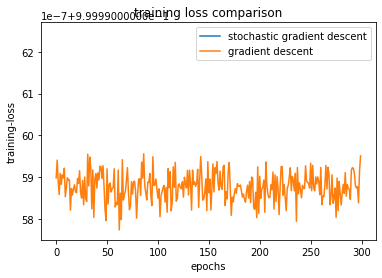

In [26]:

fig, axes = plt.subplots()
axes.plot(sgd_loss_history)  
axes.plot(loss_history1)  
plt.legend(["stochastic gradient descent", "gradient descent"])
axes.set_xlabel("epochs")
axes.set_ylabel("training-loss")
axes.set_title("training loss comparison")
plt.show()
fig.savefig('training_loss_comparison.png',transparent=True)

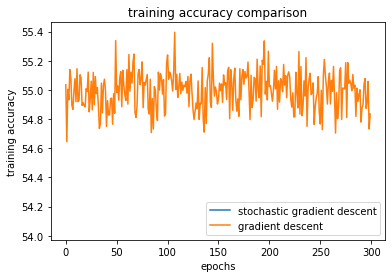

In [27]:
fig, axes = plt.subplots()
axes.plot(sgd_train_acc_history)  
axes.plot(train_acc_history1)  
plt.legend(["stochastic gradient descent", "gradient descent"])
axes.set_xlabel("epochs")
axes.set_ylabel("training accuracy")
axes.set_title("training accuracy comparison")
plt.show()
fig.savefig('training_accuracy_comparison.png',transparent=True)

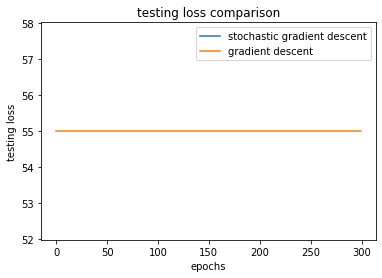

In [28]:
fig, axes = plt.subplots()
axes.plot(sgd_val_acc_history)  
axes.plot(val_acc_history1)  
plt.legend(["stochastic gradient descent", "gradient descent"])
axes.set_xlabel("epochs")
axes.set_ylabel("testing loss")
axes.set_title("testing loss comparison")
plt.show()
fig.savefig('testing_loss_comparison.png',transparent=True)

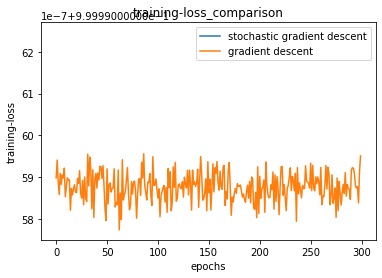

In [29]:
fig, axes = plt.subplots()
axes.plot(sgd_loss_history)  
axes.plot(loss_history1)  
plt.legend(["stochastic gradient descent", "gradient descent"])
axes.set_xlabel("epochs")
axes.set_ylabel("training-loss")
axes.set_title("training-loss_comparison")
plt.show()
fig.savefig('training-loss_comparison.png',transparent=True)

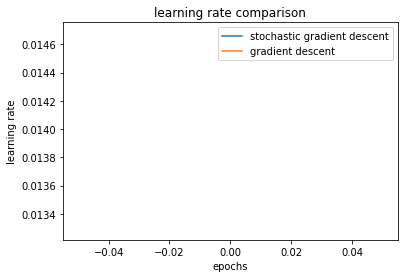

In [30]:
fig, axes = plt.subplots()
axes.plot(sgd_lr_history)  
axes.plot(lr_history1)  
plt.legend(["stochastic gradient descent", "gradient descent"])
axes.set_xlabel("epochs")
axes.set_ylabel("learning rate")
axes.set_title("learning rate comparison")
plt.show()
fig.savefig('learning_rate_comparison.png',transparent=True)